## Regression using ANN - Keras

In [104]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [105]:
# Reading the dataset
df = pd.read_csv("Data_to_ModelBuilding.csv")

# Display the first few rows of the dataset
df.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4,price
0,20,150,150000,1,0,0,1,0,0,0,...,0,0,0,1,0,2,0,0,0,4450
1,18,163,150000,0,0,0,0,0,0,0,...,0,0,0,1,0,39,1,0,0,13299
2,20,101,150000,1,0,0,0,0,0,0,...,0,0,0,1,0,38,0,0,1,3200
3,17,86,60000,0,0,0,0,0,1,0,...,0,0,1,1,0,30,0,0,1,4500
4,15,185,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,39,0,0,1,18750


In [106]:
X = df.copy()
# Remove target
y = X.pop('price')

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)  
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [109]:
X_train.shape, X_test.shape

((30852, 23), (13223, 23))

In [110]:
y_train.shape , y_test.shape

((30852,), (13223,))

In [111]:
X_train.head()

,YearsFromRegistration,powerPS,kilometer,abtest_test,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,gearbox_manual,notRepairedDamage_yes,brand_encoded,monthOfRegistration_Q2,monthOfRegistration_Q3,monthOfRegistration_Q4
0,0.166667,0.021923,0.827586,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.974359,0.0,0.0,1.0
1,0.133333,0.059292,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.512821,0.0,0.0,1.0
2,0.211111,0.103637,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.512821,1.0,0.0,0.0
3,0.211111,0.032387,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.025641,0.0,1.0,0.0
4,0.233333,0.027404,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.615385,0.0,1.0,0.0


In [112]:
y_train.head()

34921    2950
33036    6300
25839    7499
3448     2500
20701     950
Name: price, dtype: int64

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [114]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

## Training the Model

In [115]:
import time

start_time = time.time()

history = model.fit(x=X_train, y=y_train.values,
                    validation_data=(X_test, y_test.values),
                    batch_size=128, epochs=500)

end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/500
242/242 [==============================] - 2s 5ms/step - loss: 73397784.0000 - val_loss: 54676020.0000
Epoch 2/500
242/242 [==============================] - 1s 4ms/step - loss: 41164108.0000 - val_loss: 33122522.0000
Epoch 3/500
242/242 [==============================] - 1s 4ms/step - loss: 29909206.0000 - val_loss: 28911828.0000
Epoch 4/500
242/242 [==============================] - 1s 4ms/step - loss: 27824062.0000 - val_loss: 27438692.0000
Epoch 5/500
242/242 [==============================] - 1s 4ms/step - loss: 26631478.0000 - val_loss: 26109538.0000
Epoch 6/500
242/242 [==============================] - 1s 4ms/step - loss: 25893068.0000 - val_loss: 25628032.0000
Epoch 7/500
242/242 [==============================] - 1s 4ms/step - loss: 25199958.0000 - val_loss: 24670216.0000
Epoch 8/500
242/242 [==============================] - 1s 4ms/step - loss: 24733668.0000 - val_loss: 24419034.0000
Epoch 9/500
242/242 [==============================] - 1s 4ms/step - loss: 24296

242/242 [==============================] - 1s 4ms/step - loss: 13255889.0000 - val_loss: 14478062.0000
Epoch 72/500
242/242 [==============================] - 1s 5ms/step - loss: 13345731.0000 - val_loss: 14280571.0000
Epoch 73/500
242/242 [==============================] - 1s 4ms/step - loss: 13268174.0000 - val_loss: 13973555.0000
Epoch 74/500
242/242 [==============================] - 1s 4ms/step - loss: 13242767.0000 - val_loss: 13894420.0000
Epoch 75/500
242/242 [==============================] - 1s 4ms/step - loss: 13144094.0000 - val_loss: 14080760.0000
Epoch 76/500
242/242 [==============================] - 1s 4ms/step - loss: 13125731.0000 - val_loss: 14512276.0000
Epoch 77/500
242/242 [==============================] - 1s 4ms/step - loss: 13396691.0000 - val_loss: 13987708.0000
Epoch 78/500
242/242 [==============================] - 1s 4ms/step - loss: 13102263.0000 - val_loss: 14175548.0000
Epoch 79/500
242/242 [==============================] - 1s 4ms/step - loss: 13160926.

242/242 [==============================] - 1s 4ms/step - loss: 11645751.0000 - val_loss: 13584840.0000
Epoch 142/500
242/242 [==============================] - 1s 4ms/step - loss: 11540614.0000 - val_loss: 13334369.0000
Epoch 143/500
242/242 [==============================] - 1s 4ms/step - loss: 11572632.0000 - val_loss: 13432328.0000
Epoch 144/500
242/242 [==============================] - 1s 4ms/step - loss: 11482024.0000 - val_loss: 13248534.0000
Epoch 145/500
242/242 [==============================] - 1s 4ms/step - loss: 11545608.0000 - val_loss: 13512859.0000
Epoch 146/500
242/242 [==============================] - 1s 4ms/step - loss: 11483191.0000 - val_loss: 13357853.0000
Epoch 147/500
242/242 [==============================] - 1s 4ms/step - loss: 11604251.0000 - val_loss: 13448353.0000
Epoch 148/500
242/242 [==============================] - 1s 4ms/step - loss: 11624821.0000 - val_loss: 13835524.0000
Epoch 149/500
242/242 [==============================] - 1s 4ms/step - loss: 1

242/242 [==============================] - 1s 5ms/step - loss: 10435862.0000 - val_loss: 13501836.0000
Epoch 212/500
242/242 [==============================] - 1s 5ms/step - loss: 10215146.0000 - val_loss: 13258160.0000
Epoch 213/500
242/242 [==============================] - 1s 4ms/step - loss: 10243543.0000 - val_loss: 13743044.0000
Epoch 214/500
242/242 [==============================] - 1s 4ms/step - loss: 10232403.0000 - val_loss: 13622401.0000
Epoch 215/500
242/242 [==============================] - 1s 5ms/step - loss: 10219797.0000 - val_loss: 13843272.0000
Epoch 216/500
242/242 [==============================] - 1s 4ms/step - loss: 10165092.0000 - val_loss: 13419329.0000
Epoch 217/500
242/242 [==============================] - 1s 4ms/step - loss: 10242907.0000 - val_loss: 13549701.0000
Epoch 218/500
242/242 [==============================] - 1s 4ms/step - loss: 10208928.0000 - val_loss: 13650769.0000
Epoch 219/500
242/242 [==============================] - 1s 4ms/step - loss: 1

242/242 [==============================] - 1s 4ms/step - loss: 9064532.0000 - val_loss: 14513445.0000
Epoch 282/500
242/242 [==============================] - 1s 4ms/step - loss: 9140866.0000 - val_loss: 14228411.0000
Epoch 283/500
242/242 [==============================] - 1s 4ms/step - loss: 9156369.0000 - val_loss: 14407269.0000
Epoch 284/500
242/242 [==============================] - 1s 4ms/step - loss: 9075695.0000 - val_loss: 14585144.0000
Epoch 285/500
242/242 [==============================] - 1s 5ms/step - loss: 9396439.0000 - val_loss: 14547112.0000
Epoch 286/500
242/242 [==============================] - 1s 4ms/step - loss: 9236213.0000 - val_loss: 14419873.0000
Epoch 287/500
242/242 [==============================] - 1s 4ms/step - loss: 9296329.0000 - val_loss: 14333965.0000
Epoch 288/500
242/242 [==============================] - 1s 4ms/step - loss: 9025238.0000 - val_loss: 15199552.0000
Epoch 289/500
242/242 [==============================] - 1s 4ms/step - loss: 9108602.0

242/242 [==============================] - 1s 4ms/step - loss: 8365298.5000 - val_loss: 15119404.0000
Epoch 352/500
242/242 [==============================] - 1s 4ms/step - loss: 8542023.0000 - val_loss: 14271429.0000
Epoch 353/500
242/242 [==============================] - 1s 4ms/step - loss: 8343608.0000 - val_loss: 14357389.0000
Epoch 354/500
242/242 [==============================] - 1s 4ms/step - loss: 8418281.0000 - val_loss: 14674333.0000
Epoch 355/500
242/242 [==============================] - 1s 4ms/step - loss: 8418680.0000 - val_loss: 14542449.0000
Epoch 356/500
242/242 [==============================] - 1s 4ms/step - loss: 8562144.0000 - val_loss: 14619260.0000
Epoch 357/500
242/242 [==============================] - 1s 4ms/step - loss: 9625566.0000 - val_loss: 14443687.0000
Epoch 358/500
242/242 [==============================] - 1s 4ms/step - loss: 8415304.0000 - val_loss: 14296831.0000
Epoch 359/500
242/242 [==============================] - 1s 4ms/step - loss: 8463572.0

Epoch 422/500
242/242 [==============================] - 1s 4ms/step - loss: 8023748.5000 - val_loss: 15115346.0000
Epoch 423/500
242/242 [==============================] - 1s 4ms/step - loss: 7919002.0000 - val_loss: 15606497.0000
Epoch 424/500
242/242 [==============================] - 1s 4ms/step - loss: 7943595.0000 - val_loss: 14275730.0000
Epoch 425/500
242/242 [==============================] - 1s 4ms/step - loss: 7957401.0000 - val_loss: 17315738.0000
Epoch 426/500
242/242 [==============================] - 1s 4ms/step - loss: 8091559.0000 - val_loss: 15231335.0000
Epoch 427/500
242/242 [==============================] - 1s 4ms/step - loss: 7895469.0000 - val_loss: 15066413.0000
Epoch 428/500
242/242 [==============================] - 1s 4ms/step - loss: 7820359.5000 - val_loss: 16317723.0000
Epoch 429/500
242/242 [==============================] - 1s 4ms/step - loss: 8066278.5000 - val_loss: 15109957.0000
Epoch 430/500
242/242 [==============================] - 1s 4ms/step - l

242/242 [==============================] - 1s 4ms/step - loss: 7432132.5000 - val_loss: 15320713.0000
Epoch 493/500
242/242 [==============================] - 1s 4ms/step - loss: 7451953.0000 - val_loss: 15795484.0000
Epoch 494/500
242/242 [==============================] - 1s 4ms/step - loss: 7385996.5000 - val_loss: 15647036.0000
Epoch 495/500
242/242 [==============================] - 1s 4ms/step - loss: 7512337.0000 - val_loss: 15055633.0000
Epoch 496/500
242/242 [==============================] - 1s 4ms/step - loss: 7400945.5000 - val_loss: 16763235.0000
Epoch 497/500
242/242 [==============================] - 1s 4ms/step - loss: 7352035.0000 - val_loss: 15723013.0000
Epoch 498/500
242/242 [==============================] - 1s 4ms/step - loss: 7803852.5000 - val_loss: 15521828.0000
Epoch 499/500
242/242 [==============================] - 1s 4ms/step - loss: 7573613.0000 - val_loss: 15939531.0000
Epoch 500/500
242/242 [==============================] - 1s 4ms/step - loss: 7521428.5

In [116]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

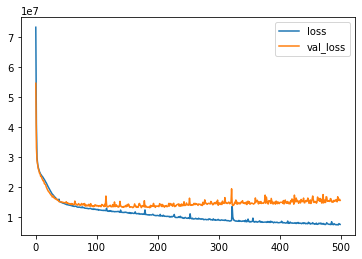

In [117]:
losses.plot()

## Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [118]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

### Predicting on Brand New Data

In [119]:
predictions = model.predict(X_test)

414/414 [==============================] - 1s 2ms/step


In [120]:
mean_absolute_error(y_test,predictions)

1814.8475845414248

In [121]:
np.sqrt(mean_squared_error(y_test,predictions))

3939.998170569342

In [122]:
explained_variance_score(y_test,predictions)

0.7495587623432642

In [123]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, predictions)

print(f'R2 Score: {r2}')

R2 Score: 0.7494463768522753


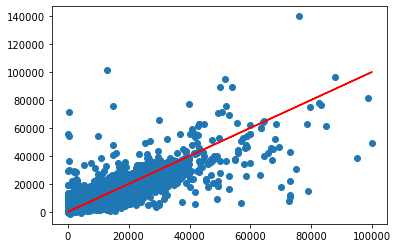

In [124]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [125]:
y_test.shape

(13223,)

In [126]:
errors = y_test.values.reshape(13223, 1) - predictions


<AxesSubplot:ylabel='Density'>

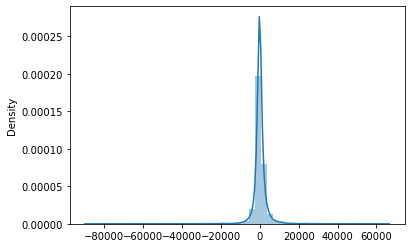

In [127]:
sns.distplot(errors)